# Final Project Python Course_Spring 2024
### Author: Habibullah Perozi,    Dataset: smoke_detection_iot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("smoke_detection_iot.csv", index_col=0)
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


In [4]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [5]:
data.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [6]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [7]:
#convert UTC to real timestamp

In [8]:
timestamps = pd.to_datetime(data['UTC'], unit='s')
utc_times = timestamps.dt.tz_localize(None)
data['UTC'] = utc_times
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [9]:
data['NC0.5'].unique()

array([ 0.  ,  0.14,  0.13, ..., 26.73, 24.89, 19.27])

In [10]:
data['Fire Alarm'].unique()

array([0, 1], dtype=int64)

In [11]:
data['Pressure[hPa]'].unique()

array([939.735, 939.744, 939.738, ..., 936.635, 936.642, 936.659])

In [12]:
#null values and duplicates

In [13]:
data.isnull().any()

UTC               False
Temperature[C]    False
Humidity[%]       False
TVOC[ppb]         False
eCO2[ppm]         False
Raw H2            False
Raw Ethanol       False
Pressure[hPa]     False
PM1.0             False
PM2.5             False
NC0.5             False
NC1.0             False
NC2.5             False
CNT               False
Fire Alarm        False
dtype: bool

In [14]:
data.duplicated().any()

False

In [15]:
# outliers

In [16]:
def draw_boxplot_with_zscores(data, column_name, title="Boxplot with Z-Scores"):
    df = data.copy()
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    df['z_score'] = z_scores
    
    q1 = df['z_score'].quantile(0.25)
    q3 = df['z_score'].quantile(0.75)
    iqr = q3 - q1
    
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    outliers = df[(df['z_score'] < lower_whisker) | (df['z_score'] > upper_whisker)]
    
    plt.figure(figsize=(8, 1))
    plt.boxplot(outliers['z_score'], notch=True, patch_artist=True, vert=False)
    plt.xlabel('Data (Z-Scores)')
    plt.ylabel(column_name)
    plt.title(title)
    plt.grid(True)
    plt.show()

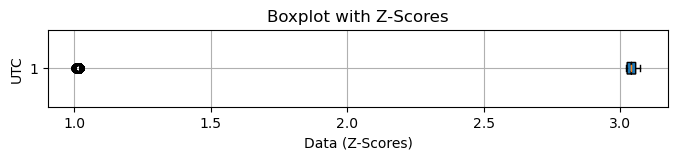

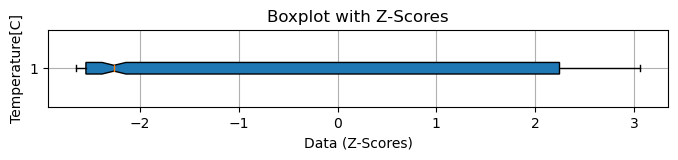

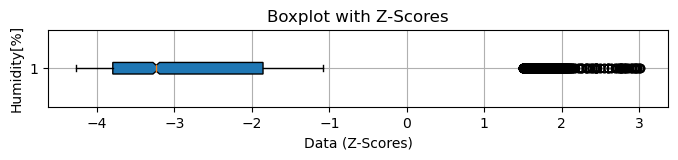

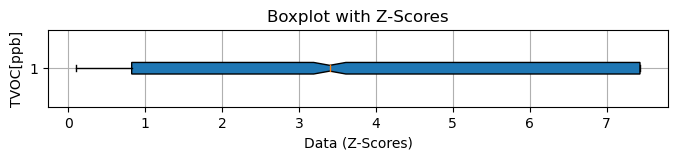

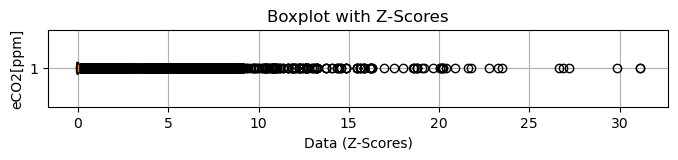

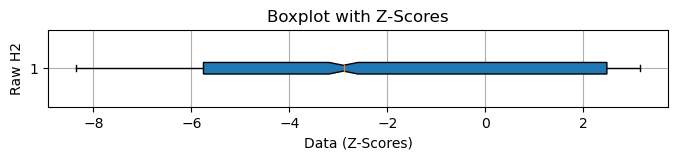

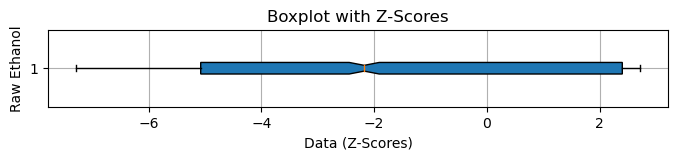

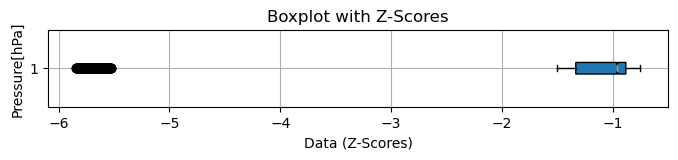

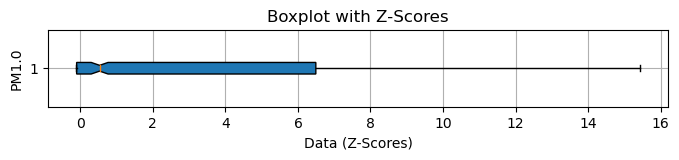

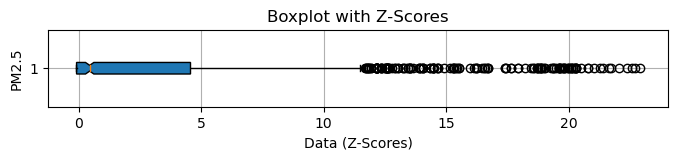

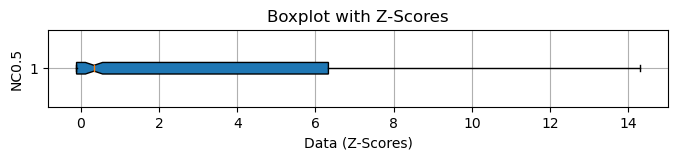

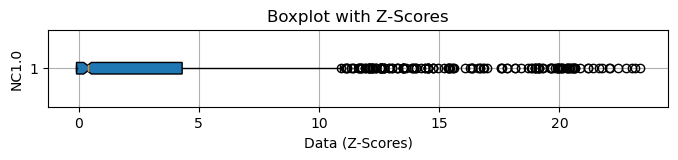

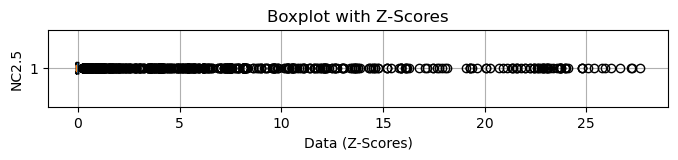

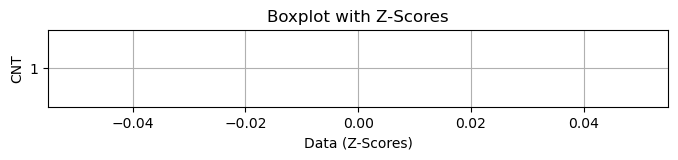

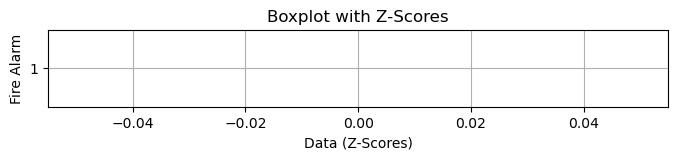

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:
list(map(lambda col: draw_boxplot_with_zscores(data.copy(), col), data.columns))

##### As we can see there are some outliers apperently in some variables. BUT that is because of a sudden changes due to the fire which the sensor captures. we can't remove them cause that's the indicator of fire alarm, which hugly different from the normal records and pattterns. Usually the sensor outputs the accurate data.

### so our data is pretty clean and ready to get done the EDA analysis and Preprocessing

In [18]:
data.tail()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,2022-06-13 14:20:47,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,2022-06-13 14:20:48,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,2022-06-13 14:20:49,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,2022-06-13 14:20:50,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,2022-06-13 14:20:51,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [19]:
#what is the realtionship between eCO2 and Temperature?

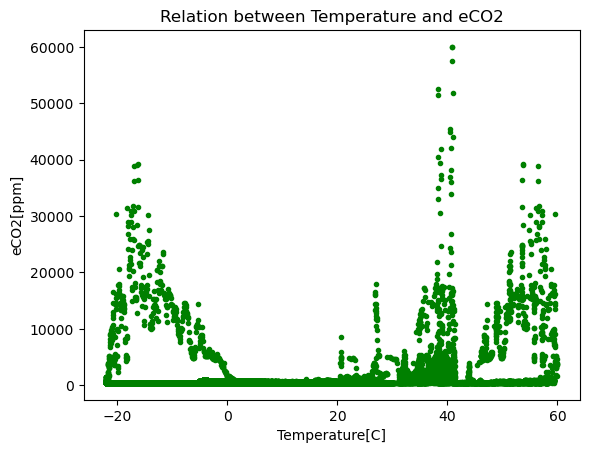

In [20]:
x = data['Temperature[C]']
y = data['eCO2[ppm]']
plt.plot(x, y, '.', color='green') 
plt.title('Relation between Temperature and eCO2')  
plt.xlabel('Temperature[C]')  
plt.ylabel('eCO2[ppm]') 
plt.style.use('dark_background')
plt.show()

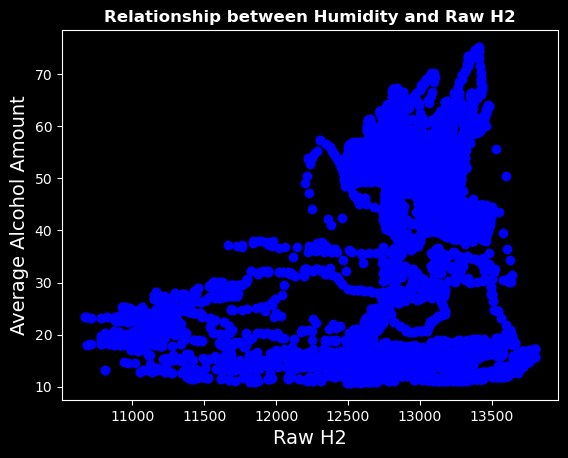

In [21]:
fig = plt.figure()
y = data['Humidity[%]']
x = data['Raw H2']
plt.plot(x,y, 'bo', label='average alcohol')
plt.title('Relationship between Humidity and Raw H2',loc ='center', fontweight ='bold')
plt.xlabel('Raw H2', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.ylabel('Average Alcohol Amount', fontsize=14)
plt.style.use('dark_background')

###### not a strong relationship

In [22]:
dfNumeric = data.select_dtypes(include=np.number)
dfNumeric.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


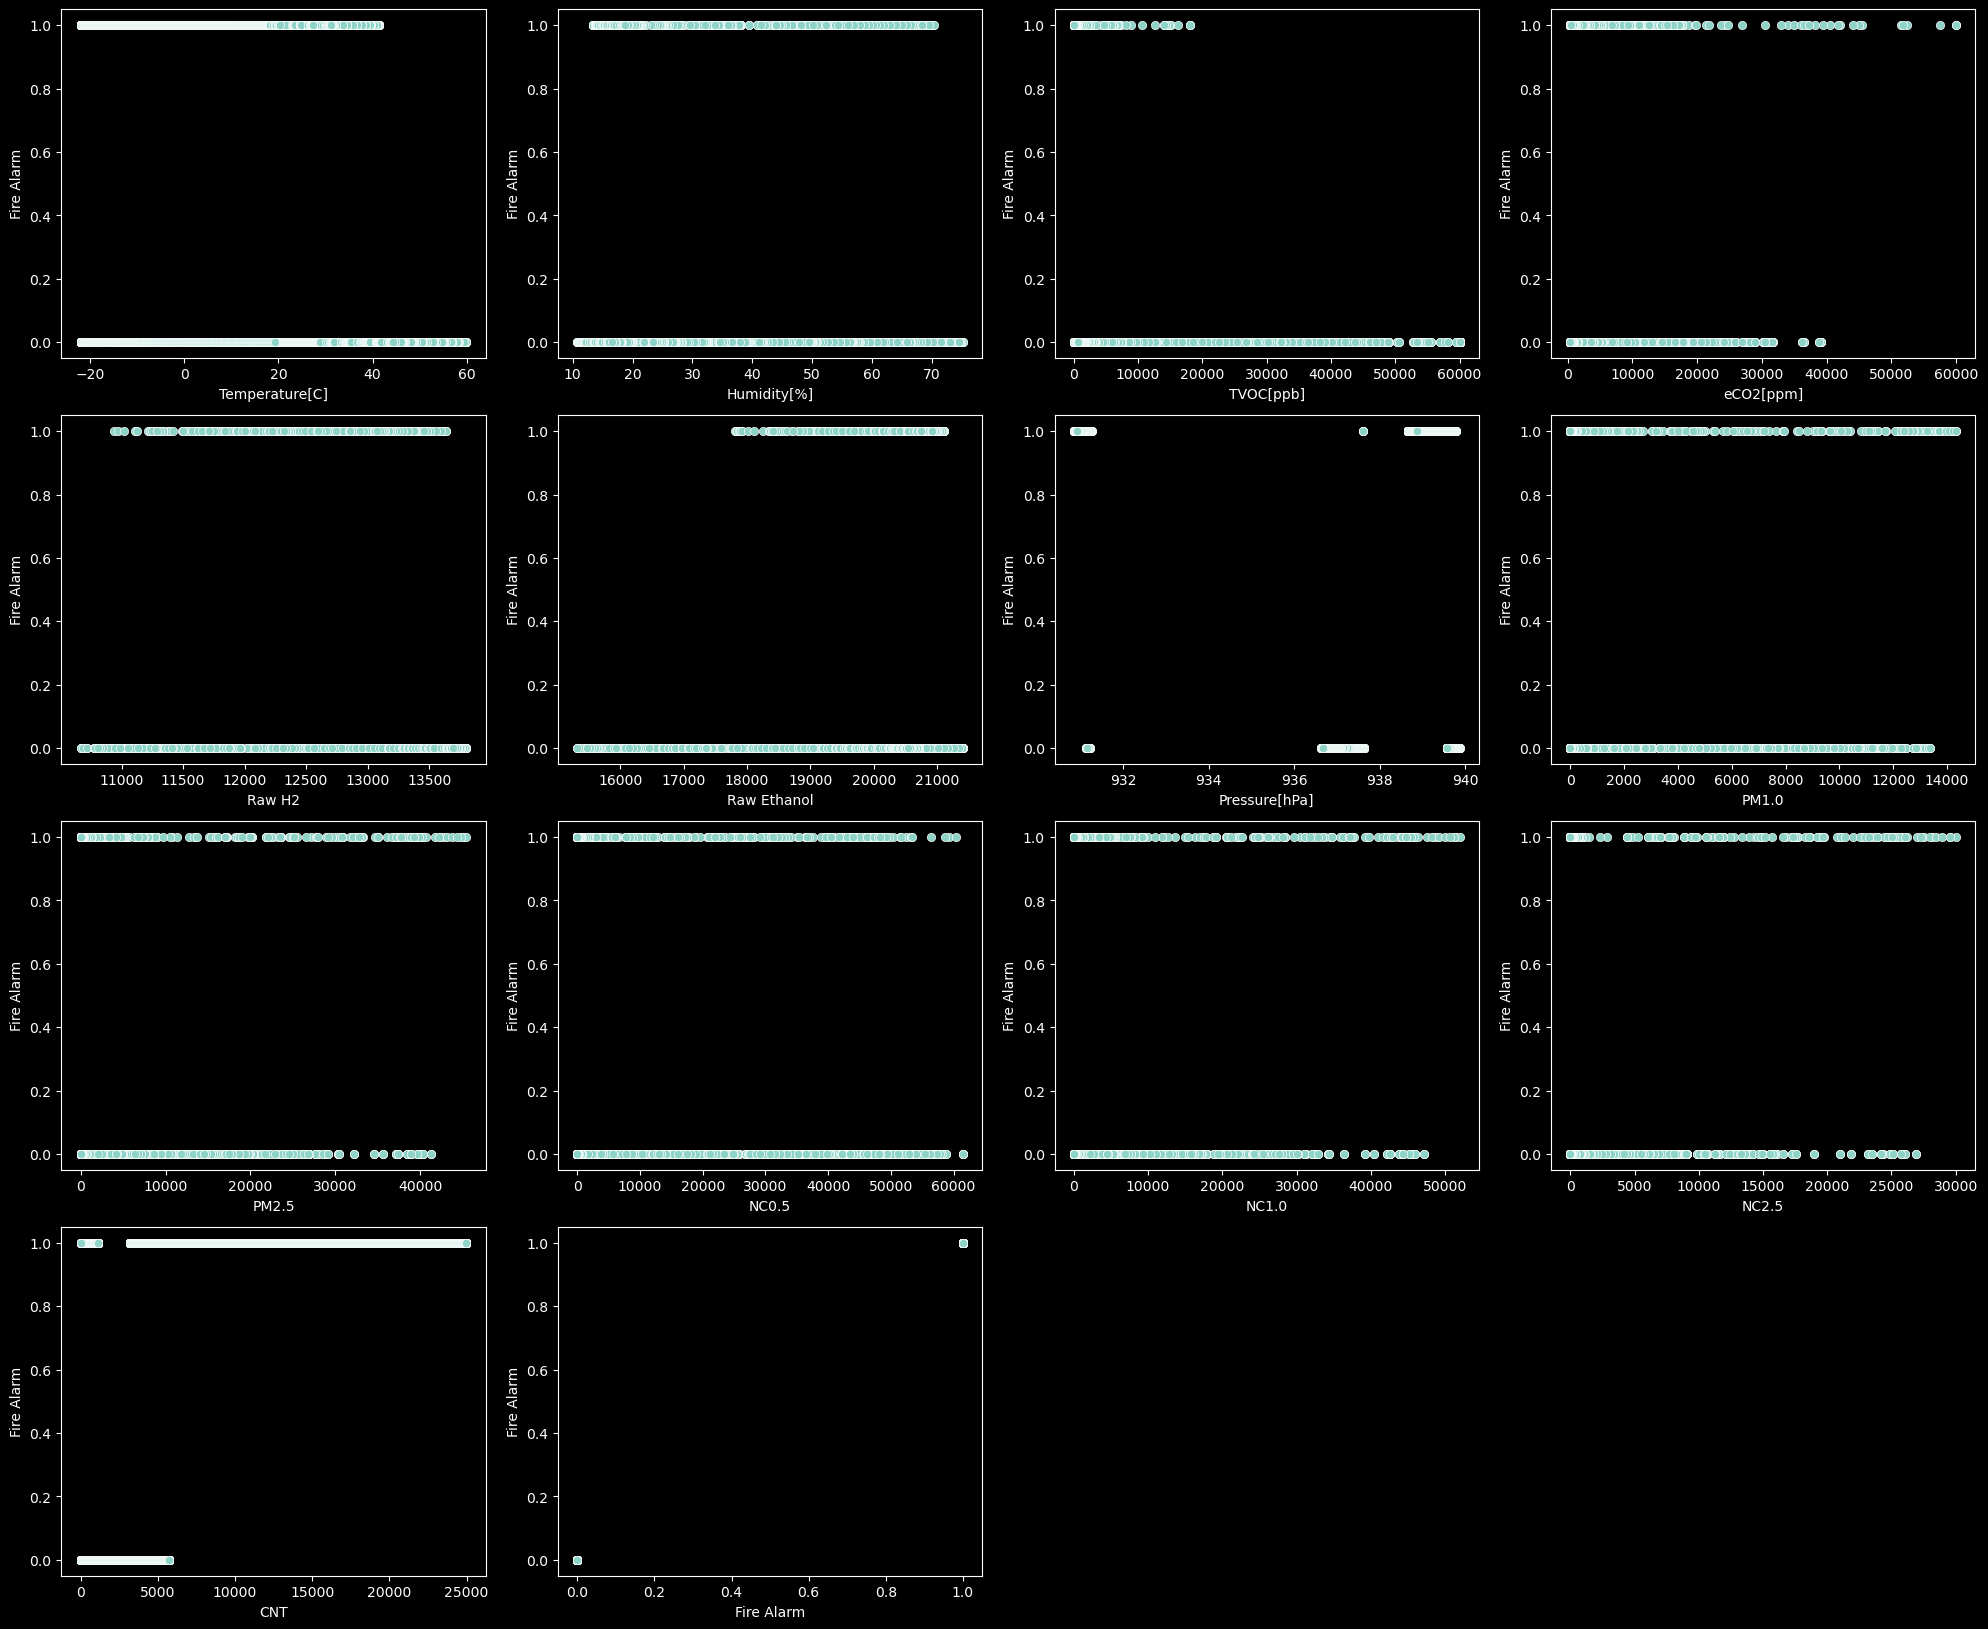

In [23]:
plt.figure(figsize=(20,20))
plt.style.use('dark_background')
for index,column in enumerate(dfNumeric):
    plt.subplot(5,4,index+1)
    sns.scatterplot(data=dfNumeric,x=column,y=data["Fire Alarm"])   
plt.tight_layout(pad = 1.0)

In [24]:
data_1= data.groupby(['Fire Alarm'])['Humidity[%]'].count()
data_1 = data_1.reset_index()
data_1

,Fire Alarm,Humidity[%]
0,0,17873
1,1,44757


Text(0.5, 1.0, 'Humidity values count by Fire Alarm')

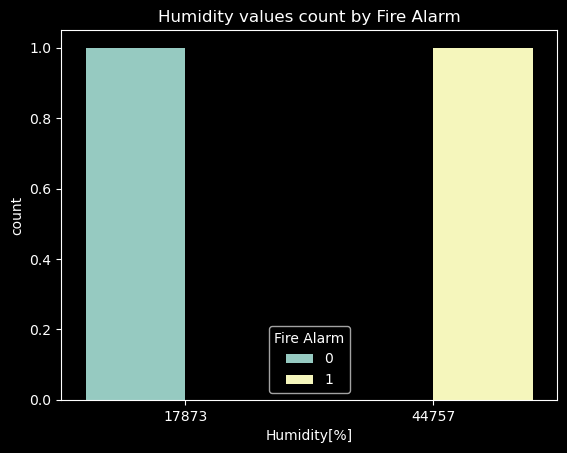

In [25]:
sns.countplot(x='Humidity[%]',data=data_1,hue='Fire Alarm')
plt.title("Humidity values count by Fire Alarm")

In [26]:
#let check hows the pressure

Text(0.5, 1.0, 'Pressure Density')

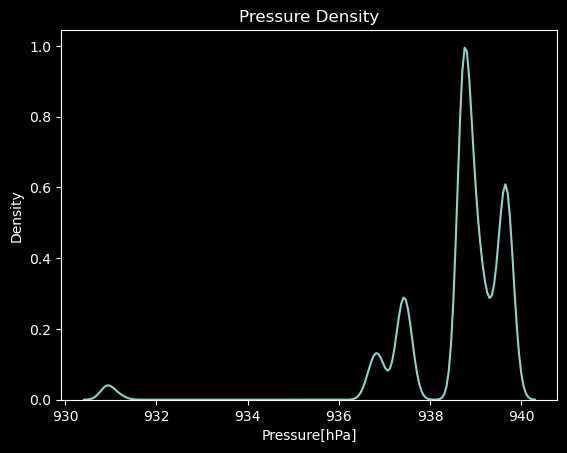

In [27]:
plt.style.use('dark_background')
sns.kdeplot(data, x='Pressure[hPa]')
plt.title("Pressure Density")

In [28]:
#chaning Pressure to categorical since there is 3 categories.

In [29]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [30]:
bins = [930, 932, 934, 936, 938, 940]
labels = ["1", "2", "3","4","5"]
data['Pressure[hPa]'] = pd.cut(data['Pressure[hPa]'], bins=bins, labels=labels)

In [31]:
data.tail()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,2022-06-13 14:20:47,18.438,15.79,625,400,13723,20569,4,0.63,0.65,4.32,0.673,0.015,5739,0
62626,2022-06-13 14:20:48,18.653,15.87,612,400,13731,20588,4,0.61,0.63,4.18,0.652,0.015,5740,0
62627,2022-06-13 14:20:49,18.867,15.84,627,400,13725,20582,4,0.57,0.60,3.95,0.617,0.014,5741,0
62628,2022-06-13 14:20:50,19.083,16.04,638,400,13712,20566,4,0.57,0.59,3.92,0.611,0.014,5742,0
62629,2022-06-13 14:20:51,19.299,16.52,643,400,13696,20543,4,0.57,0.59,3.90,0.607,0.014,5743,0


In [32]:
#chaning date to categorical base on days.

In [33]:
data.UTC.min()

Timestamp('2022-06-08 18:16:27')

In [34]:
data.UTC.max()

Timestamp('2022-06-13 14:20:51')

In [35]:
data.UTC.astype('datetime64[ns]')
data['date_day_category'] = data['UTC'].dt.day
data['date_day_category'].unique()

array([ 9, 10,  8, 13])

In [36]:
data.head(1)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,date_day_category
0,2022-06-09 00:08:51,20.0,57.36,0,400,12306,18520,5,0.0,0.0,0.0,0.0,0.0,0,0,9


Text(0.5, 1.0, 'Dates/days that Fire Alarmed or not Alarmed')

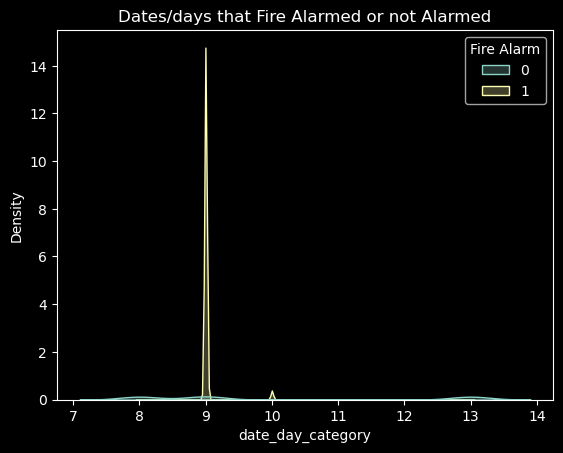

In [37]:
# Age distribution by Pclass
sns.kdeplot(x='date_day_category', data=data, hue='Fire Alarm',fill=True)
plt.title("Dates/days that Fire Alarmed or not Alarmed")

#### Corelation Aanalysis 

<Axes: >

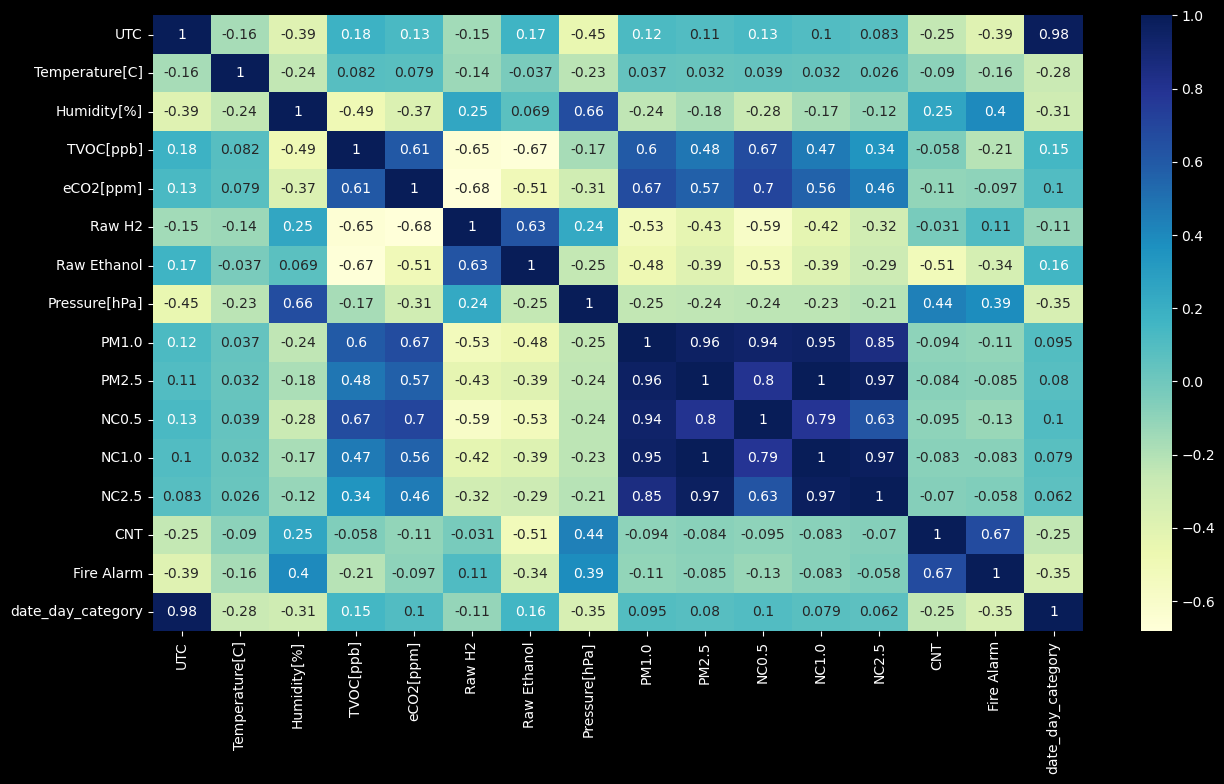

In [38]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot = True, cmap="YlGnBu")

#### Normalizing the dataset 

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
del data['UTC']

In [41]:
data.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'Fire Alarm', 'date_day_category'],
      dtype='object')

In [42]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(data)
data_tf
df = pd.DataFrame(data_tf,columns=['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'Fire Alarm', 'date_day_category'])

df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,date_day_category
0,0.512692,0.723239,0.0,0.0,0.522488,0.525685,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.2
1,0.512875,0.712535,0.0,0.0,0.534928,0.547185,1.0,0.0,0.0,0.0,0.0,0.0,0.00004,0.0,0.2
2,0.513046,0.701520,0.0,0.0,0.544179,0.565731,1.0,0.0,0.0,0.0,0.0,0.0,0.00008,0.0,0.2
3,0.513229,0.690971,0.0,0.0,0.549282,0.579682,1.0,0.0,0.0,0.0,0.0,0.0,0.00012,0.0,0.2
4,0.513412,0.681818,0.0,0.0,0.553429,0.591498,1.0,0.0,0.0,0.0,0.0,0.0,0.00016,0.0,0.2


In [43]:
X = df.drop("Fire Alarm",axis=1)
y = df["Fire Alarm"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.978718731136931

#### Random Forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rd = RandomForestClassifier()
rd.fit(X_train,y_train)
y_pred = rd.predict(X_test)

In [49]:
roc_auc_score(y_test,y_pred)

0.9999080036798529

##### so our model Accuracy is 0.9999

In [50]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 5434,     1],
       [    0, 13354]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

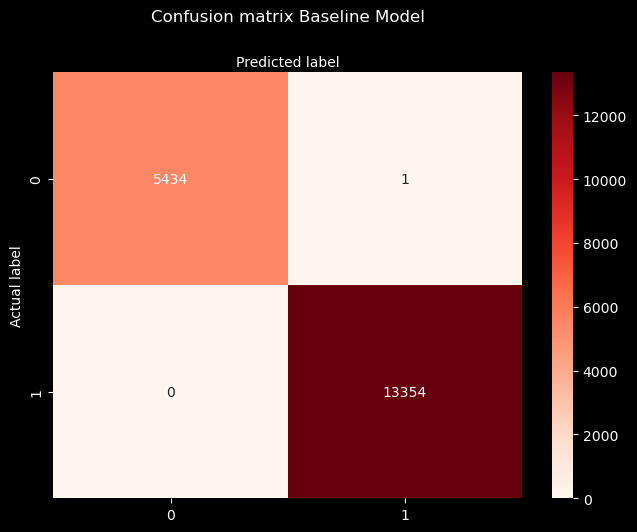

In [51]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Baseline Model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
#ROC Curve and auc score

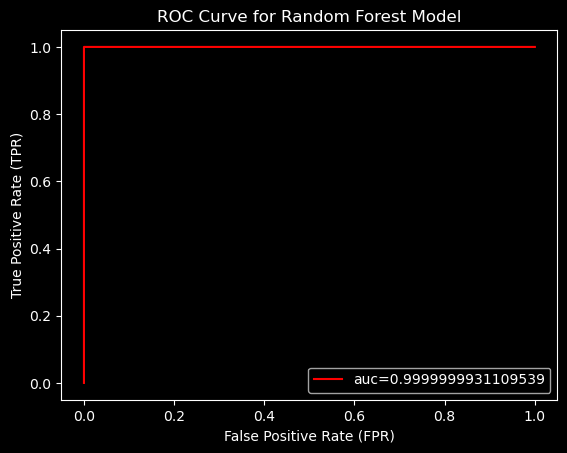

In [53]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rd.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc), color ="red")
plt.title('ROC Curve for Random Forest Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc=4)
plt.show()

##### Thanks dear professor 

##### end